In [1]:
import matplotlib.pyplot as plt
from Composite.CreateLines.CreateLines import CreateLines
from djccx.inp.inp import inp

In [2]:
lines = {
    "r": 2.5,
    "Nx_sq": 1,
    "Ny_sq": 1,
    "type":  'sin' # 'circle' or 'sin'
}

lines = CreateLines(lines)

In [3]:
lines["designs"]["B"]

{'ly_0': [array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 5.00250125e-03, 0.00000000e+00],
         [0.00000000e+00, 1.00050025e-02, 0.00000000e+00],
         ...,
         [0.00000000e+00, 9.98999500e+00, 0.00000000e+00],
         [0.00000000e+00, 9.99499750e+00, 0.00000000e+00],
         [0.00000000e+00, 1.00000000e+01, 0.00000000e+00]], shape=(2000, 3)),
  array([[1.66666667e+00, 0.00000000e+00, 0.00000000e+00],
         [1.66666667e+00, 5.00250125e-03, 0.00000000e+00],
         [1.66666667e+00, 1.00050025e-02, 0.00000000e+00],
         ...,
         [1.66666667e+00, 9.98999500e+00, 0.00000000e+00],
         [1.66666667e+00, 9.99499750e+00, 0.00000000e+00],
         [1.66666667e+00, 1.00000000e+01, 0.00000000e+00]], shape=(2000, 3)),
  array([[3.33333333e+00, 0.00000000e+00, 0.00000000e+00],
         [3.33333333e+00, 5.00250125e-03, 0.00000000e+00],
         [3.33333333e+00, 1.00050025e-02, 0.00000000e+00],
         ...,
         [3.33333333e+00, 9

In [4]:
def plot_design(design):
    # to list
    design = [design[key] for key in design.keys()]
    colors = ['r','g','b','y']
    for trajs, color in zip(design, colors):
        for traj in trajs:
            plt.plot(traj[:,0],traj[:,1],color=color)
            # init 
            plt.plot(traj[0,0],traj[0,1],'o',color=color)

<Figure size 640x480 with 0 Axes>

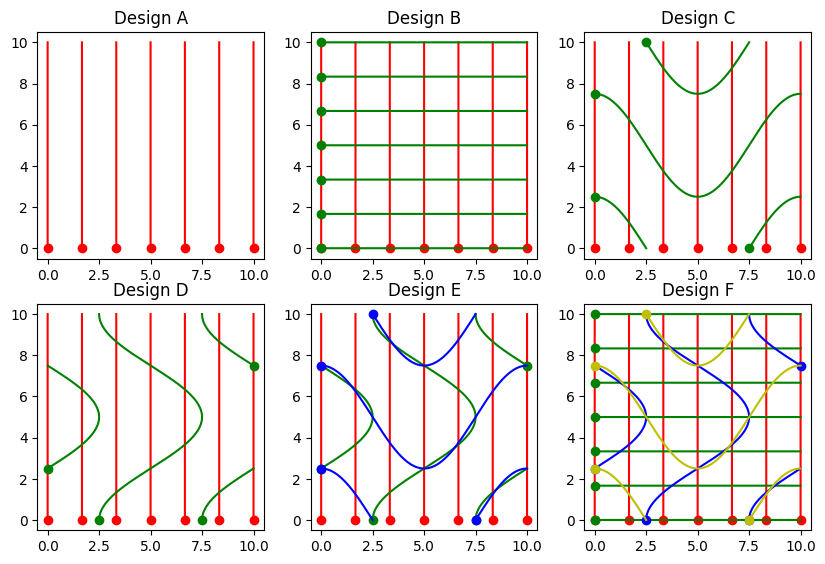

In [5]:

fig = plt.figure()
designs = [ lines["designs"][ikey] 
           for ikey in lines["designs"].keys() ]

nds_sq = len(designs)
nds = int(nds_sq**0.5) 
nds = nds if nds**2 >= nds_sq else nds+1

fig = plt.figure()
fig.set_size_inches(10,10)
for i,idesign in enumerate(designs):
    plt.subplot(nds,nds,i+1)
    plot_design(idesign)
    plt.title('Design %s' % chr(65+i))
    # aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')


[7.5 0.  0. ] [10.   2.5  0. ]
[10.   7.5  0. ] [ 7.5 10.   0. ]
[0.  2.5 0. ] [0.  7.5 0. ]
[2.5 0.  0. ] [ 2.5 10.   0. ]


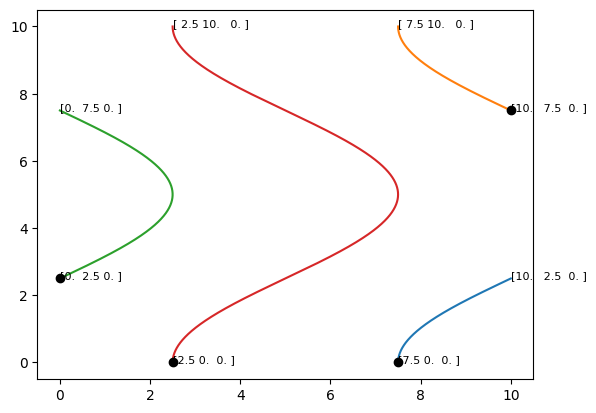

In [6]:
E_ly_1 = lines["designs"]["D"]["ly_1"]
fig = plt.figure()
for i in range(len(E_ly_1)):
    plt.plot(E_ly_1[i][:,0],E_ly_1[i][:,1],'-')
    # 
    plt.plot(E_ly_1[i][0,0],E_ly_1[i][0,1],'ko')

# draw in the initial and final points the coordinates
for i in range(len(E_ly_1)):
    plt.text(E_ly_1[i][0,0],E_ly_1[i][0,1],'%s' % E_ly_1[i][0,:],fontsize=8)
    plt.text(E_ly_1[i][-1,0],E_ly_1[i][-1,1],'%s' % E_ly_1[i][-1,:],fontsize=8)
    print(E_ly_1[i][0,:],E_ly_1[i][-1,:])

In [7]:

import os,shutil
# remove output folder if exists

# create output folder




In [8]:
from Composite.CreateComposite.CreateComposite import CreateComposite

In [9]:
def run(select_design):

    ouput_folder = "output/designs/" + select_design

    if os.path.exists(ouput_folder):
        shutil.rmtree(ouput_folder)
    os.makedirs(ouput_folder)

    fc_mesh_max_d = {
        "A": 2.5,
        "B": 2.5,
        "C": 1.5,
        "D": 2.5,
        "E": 2.5, # 2.5
        "F": 2.5,
    }

    fc_mesh_min_d = {
        "A": 0.5,
        "B": 0.5,
        "C": 0.5,
        "D": 0.6,
        "E": 0.6, # 0.45
        "F": 0.45,
    }
    params_composite ={
        "r"         :  0.25,
        "Lx"     :  lines["Lx"],
        "Ly"     :  lines["Ly"],
        "trajs_layers" : lines["designs"][select_design],
        "h"         :  0.75,
        "z0"        :  2.82/2,
        "density"   : 4,
        "interface_factor"  :  1.2,
        "with_interface"    : True,
        "fc_mesh_min"       : fc_mesh_min_d[select_design],
        "fc_mesh_max"       : fc_mesh_max_d[select_design],
        "mirror"            : True,
    }
    output_folder = ouput_folder.split(os.sep)
    params_composite = CreateComposite(params_composite,output_folder)


    inp_f = inp(os.path.join(output_folder[0],"composite.inp"))
    inp_f.remove_by_type(1)
    inp_f.remove_by_type(2)

    elset_all = inp_f.CreateElsetAll()
    material  = inp_f.CreateElasticMaterial(name="Material-1",E=1e6,nu=0.3)
    section   = inp_f.CreateSolidSection(elset=elset_all,material=material)

    istep = inp_f.CreateStaticStep(nlgeom=False)

    inp_f.print(file=os.path.join(output_folder[0],"test.inp"))

    try:
        inp_f.run(output_folder[0])
        work = True
    except:
        print("Error in the inp file")
        work = False

    print(50*"-")
    print("Done")
    print(50*"-")

    return work

In [10]:
0.25*(1.2)*2 

0.6

In [11]:
2.82/2

1.41

In [12]:
# for design in ["D"]: 
#     run(design)

In [13]:
for design in ["E"]:
    print(50*"=")
    print("Design %s" % design)
    print(50*"=")

    run(design)

Design E
Layer With Sign 1 and number 1/3 done
Layer With Sign 1 and number 2/3 done
Layer With Sign 1 and number 3/3 done
Drawing planes 1 ... 
Drawing planes 2 ... 
Drawing planes 3 ... 
Meshing ... 
Running Calculix at:  output/designs/E
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\scripts\AITEX\output\designs\E\out.txt
Command:
 mpiexec -n 4 c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\.conda\Lib\site-packages\djccx\bin\ccx_dynamic.exe main
Error reading cvf file

pid:  14676 

Calculix finished

Error in the inp file
--------------------------------------------------
Done
--------------------------------------------------
